In [2]:
#Importing libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
#load dataset 
df = pd.read_csv('Netflix_dataset.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [43]:
#check first five rows and make a copy of dataset to work with
df_copy = df.copy()
df_copy.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#Check datatypes (If needed to be converted)
df_copy['release_year'] = pd.to_datetime(df_copy['release_year'])
df_copy.dtypes
#relase year converted from int to datetime

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year    datetime64[ns]
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [6]:
#Basic stats
df_copy.describe()

,release_year
count,8807
mean,1970-01-01 00:00:00.000002014
min,1970-01-01 00:00:00.000001925
25%,1970-01-01 00:00:00.000002013
50%,1970-01-01 00:00:00.000002017
75%,1970-01-01 00:00:00.000002019
max,1970-01-01 00:00:00.000002021


In [7]:
#Check missing values
df_copy.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
# Replacing NaN values in 'director' column with 'Unknown'
df_copy['director'] = df_copy['director'].fillna('Unknown')

# Verify changes by displaying first 10 rows
df_copy['director'].head(10)  

0                  Kirsten Johnson
1                          Unknown
2                  Julien Leclercq
3                          Unknown
4                          Unknown
5                    Mike Flanagan
6    Robert Cullen, José Luis Ucha
7                     Haile Gerima
8                  Andy Devonshire
9                   Theodore Melfi
Name: director, dtype: object

In [9]:
# Replacing NaN values in 'cast' column with 'Unknown'
df_copy['cast'] = df_copy['cast'].fillna('Various')

# Verify changes by displaying first 10 rows
df_copy['cast'].head(10)  

0                                              Various
1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                              Various
4    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5    Kate Siegel, Zach Gilford, Hamish Linklater, H...
6    Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
7    Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...
8    Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...
9    Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...
Name: cast, dtype: object

In [10]:
# Dropping date columns 
df_copy['date_added'] = df_copy['date_added'].dropna()

# Verify changes by displaying first 10 rows
df_copy['date_added'].head(10) 

0    25-Sep-21
1    24-Sep-21
2    24-Sep-21
3    24-Sep-21
4    24-Sep-21
5    24-Sep-21
6    24-Sep-21
7    24-Sep-21
8    24-Sep-21
9    24-Sep-21
Name: date_added, dtype: object

In [11]:
# Dropping date columns 
df_copy['rating'] = df_copy['rating'].fillna('Not Rated')

# Verify changes by displaying first 10 rows
df_copy['rating'].head(10) 

0    PG-13
1    TV-MA
2    TV-MA
3    TV-MA
4    TV-MA
5    TV-MA
6       PG
7    TV-MA
8    TV-14
9    PG-13
Name: rating, dtype: object

In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
df_copy.dtypes
df_copy["release_year"] = pd.to_numeric(df_copy["release_year"], errors="coerce").astype("Int64")
df_copy.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     Int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Text(0.5, 1.0, 'Movies Released Over the Years')

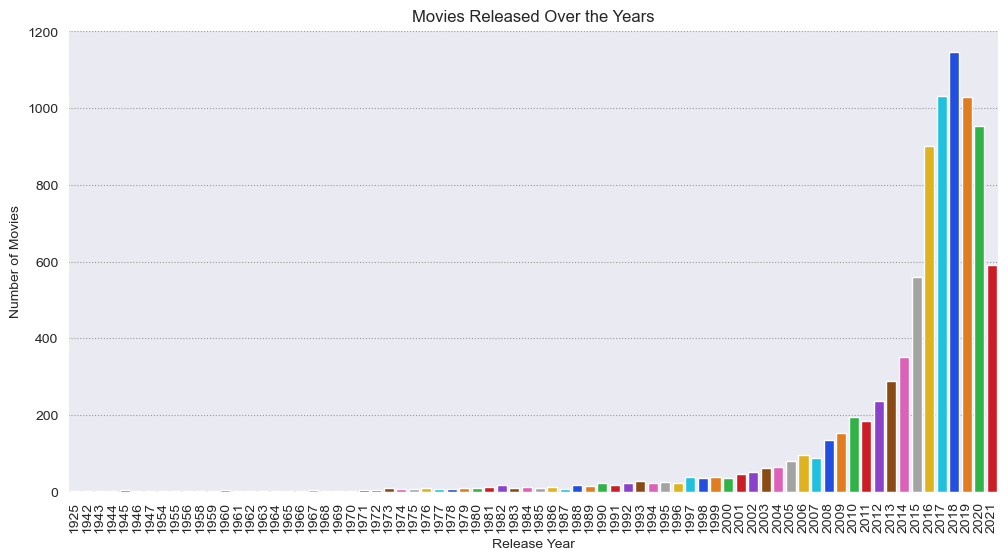

In [14]:
# Bar plot to see movies over year 
movies = df_copy.groupby('release_year')['title'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.barplot(data=movies, x="release_year", y="title", palette="bright",hue='release_year',legend=False)
plt.xticks(rotation=90) 
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.title("Movies Released Over the Years")

Text(0.5, 1.0, 'Movies Released Over the Year(2000)')

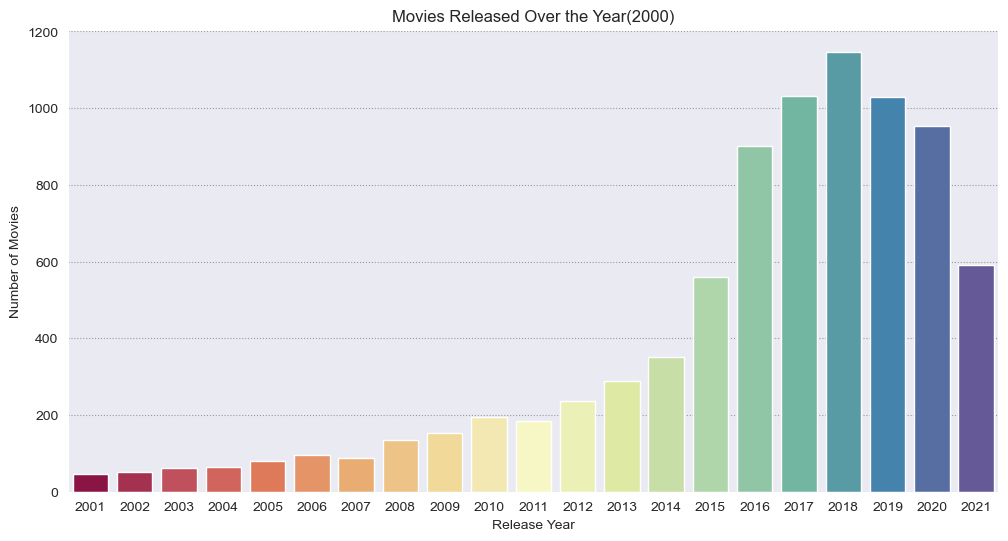

In [15]:
#Movies onward 2000 
movies_2 = df_copy[df_copy["release_year"] > 2000]
movies_2 = movies_2.groupby("release_year")["title"].count().reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.barplot(data=movies_2, x="release_year", y="title", palette="Spectral",hue='release_year',legend=False)

plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.title("Movies Released Over the Year(2000)")

Text(0.5, 1.0, 'Top 10 Contributing Countries to Netflix Content')

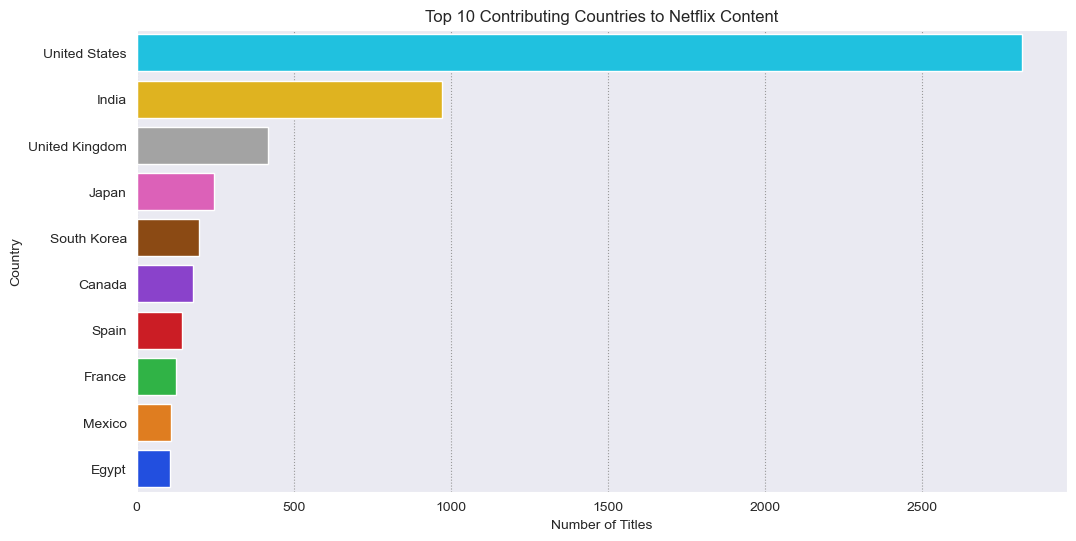

In [16]:
# Visualizing the Top 10 Contributing Countries
fix_country = df_copy['country'].dropna()
fix_country = fix_country.str.split(',')
fix_country = fix_country.explode().str.strip() 
fix_country = fix_country.reset_index(drop=True)


countries = df_copy.explode('country').groupby('country')['title'].count().reset_index()
countries = countries.sort_values(by="title", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=countries['country'], x=countries['title'], palette="bright",hue=countries['title'],legend=False)
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.title("Top 10 Contributing Countries to Netflix Content")

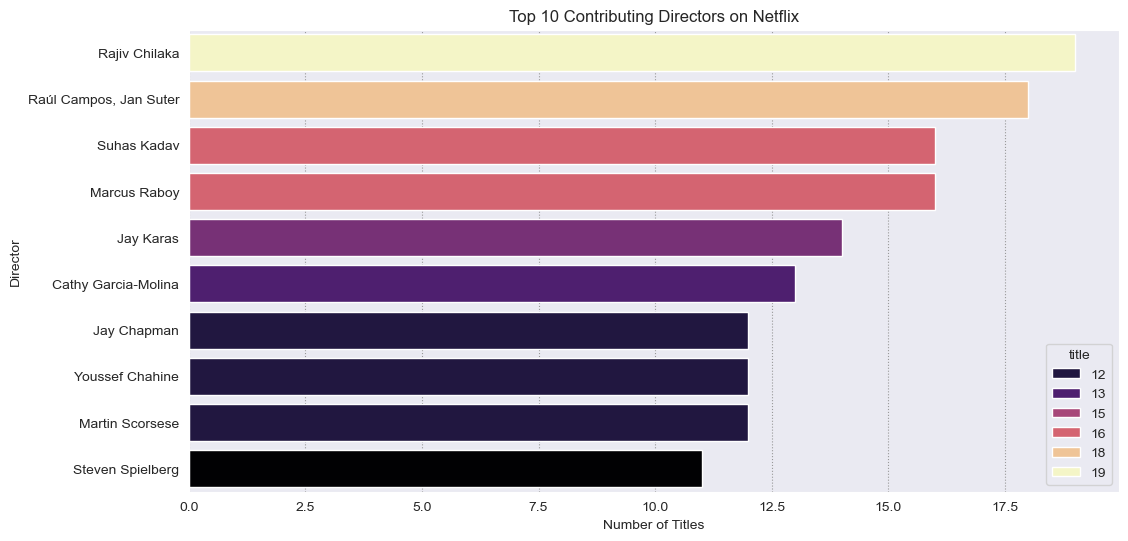

In [17]:
# Visualizing the Top 10 Contributing Directors
fix_director = df_copy['director'].dropna()
fix_director = fix_director.str.split(',')
fix_director = fix_director.explode().str.strip() 
fix_director = fix_director.reset_index(drop=True)

# Grouping directors and counting titles
directors = df_copy.explode('director').groupby('director')['title'].count().reset_index()

# Removing 'Unknown' if it exists
directors = directors[directors['director'] != 'Unknown']

# Sorting to get the top 10 directors
directors = directors.sort_values(by="title", ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(y=directors['director'], x=directors['title'], palette="magma",hue=directors['title'])
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.title("Top 10 Contributing Directors on Netflix")

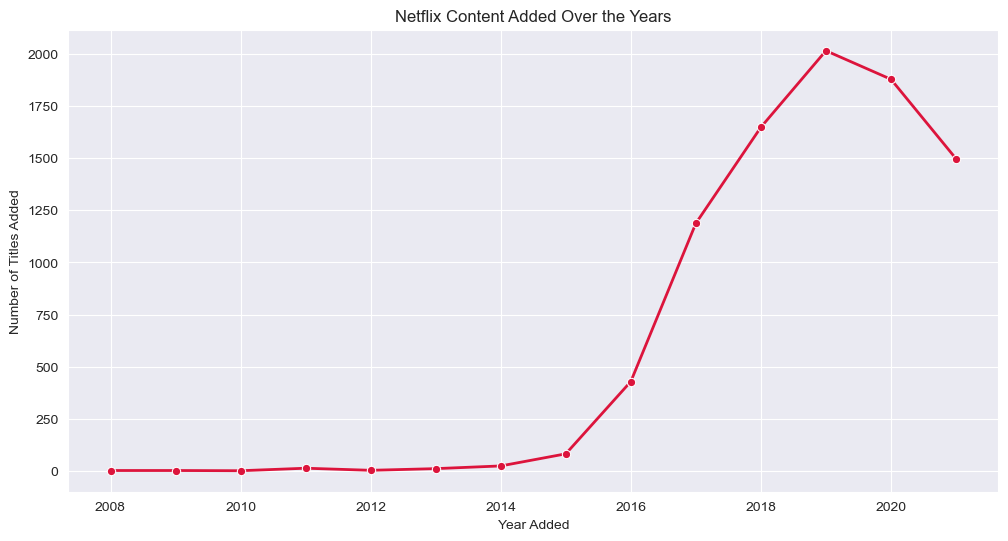

In [46]:
# Visualizing Netflix Content Added Over the Years
df_copy['date_added'] = pd.to_datetime(df_copy['date_added'])
df_copy['year_added'] = df_copy['date_added'].dt.year
df_copy["year_added"] = pd.to_numeric(df_copy["year_added"], errors="coerce").astype("Int64")

content_per_year = df_copy.groupby('year_added')['title'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.lineplot(data=content_per_year, x='year_added', y='title', marker="o", linewidth=2, color='crimson')

plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.title("Netflix Content Added Over the Years")
plt.show()


In [21]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [51]:
df_copy = df_copy.dropna(subset=["listed_in"])  
df_copy["type"] = df_copy["listed_in"].apply(
    lambda x: "Movie" if "Movies" in x else "TV Show" if "TV Shows" in x else None
)
df_copy = df_copy.dropna(subset=["type"])
df_copy["type"].value_counts()

df_copy["duration"] = df_copy["duration"].str.extract(r'(\d+)')
df_copy["duration"] = pd.to_numeric(df_copy["duration"], errors="coerce").astype("Int64")

1         2
2         1
4         2
6        91
7       125
       ... 
8802    158
8803      2
8804     88
8805     88
8806    111
Name: duration, Length: 6257, dtype: Int64

C:\Users\hp\AppData\Local\Temp\ipykernel_19404\4100537932.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=movies, y="duration", ax=axes[0], palette="bright",legend=False)


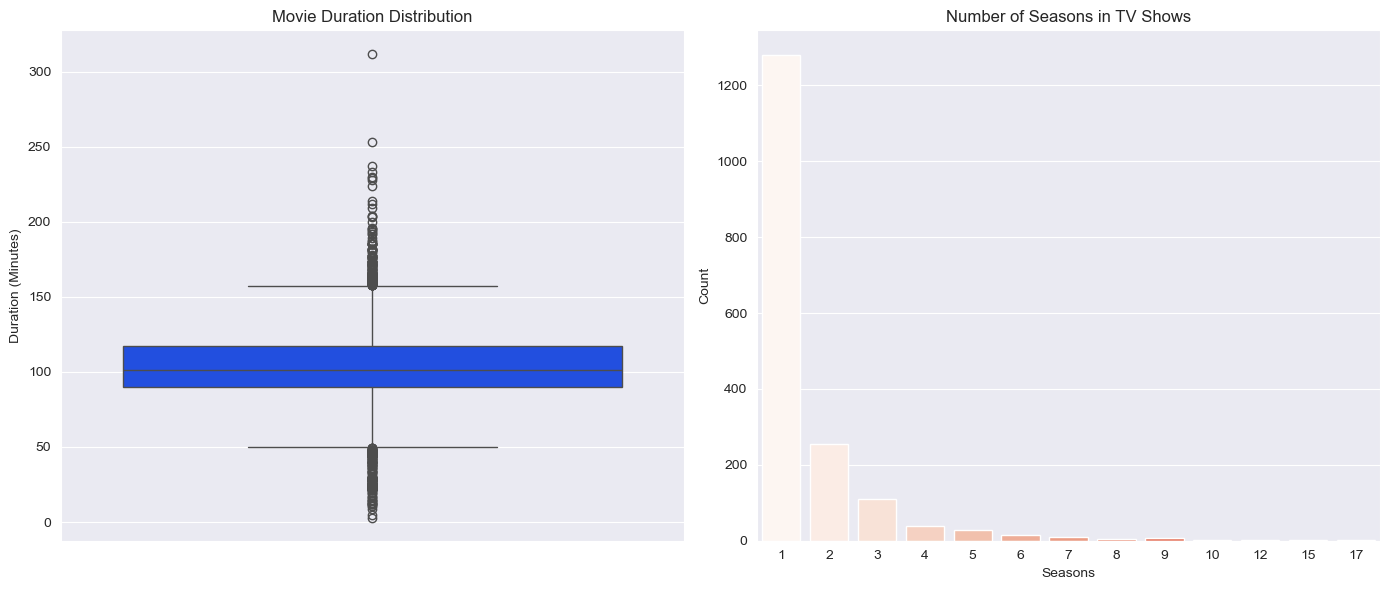

In [64]:
# Splitting Movies and TV Shows
movies = df_copy[df_copy["type"] == "Movie"]
tv_shows = df_copy[df_copy["type"] == "TV Show"]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Movies - Duration in minutes
sns.boxplot(data=movies, y="duration", ax=axes[0], palette="bright",legend=False)
axes[0].set_title("Movie Duration Distribution")
axes[0].set_ylabel("Duration (Minutes)")

# TV Shows - Duration in seasons
sns.countplot(data=tv_shows, x="duration", ax=axes[1], palette="Reds",hue='duration',legend=False)
axes[1].set_title("Number of Seasons in TV Shows")
axes[1].set_xlabel("Seasons")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of Content Ratings on Netflix')

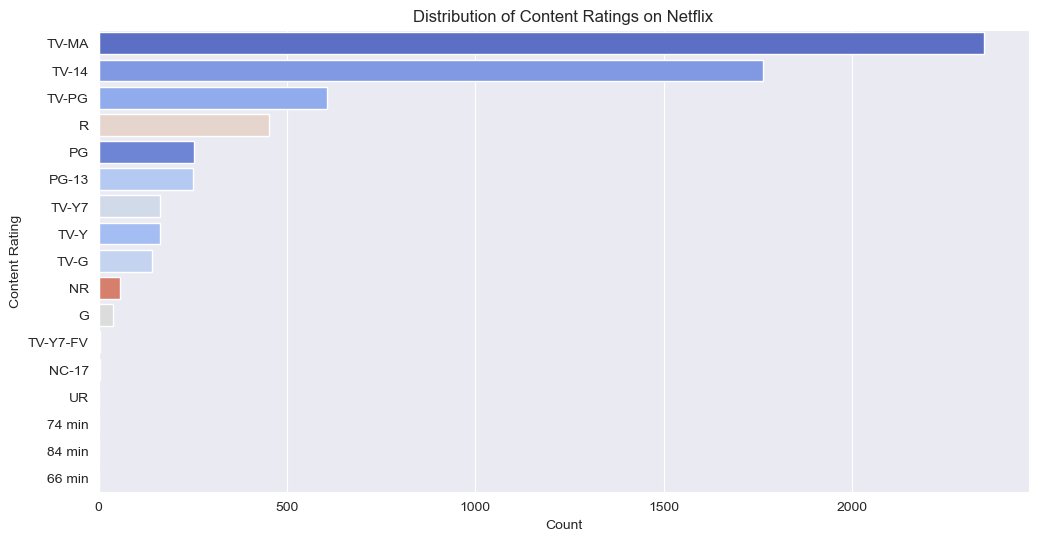

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_copy, y="rating", order=df_copy["rating"].value_counts().index, palette="coolwarm",hue='rating',legend=False)
plt.xlabel("Count")
plt.ylabel("Content Rating")
plt.title("Distribution of Content Ratings on Netflix")

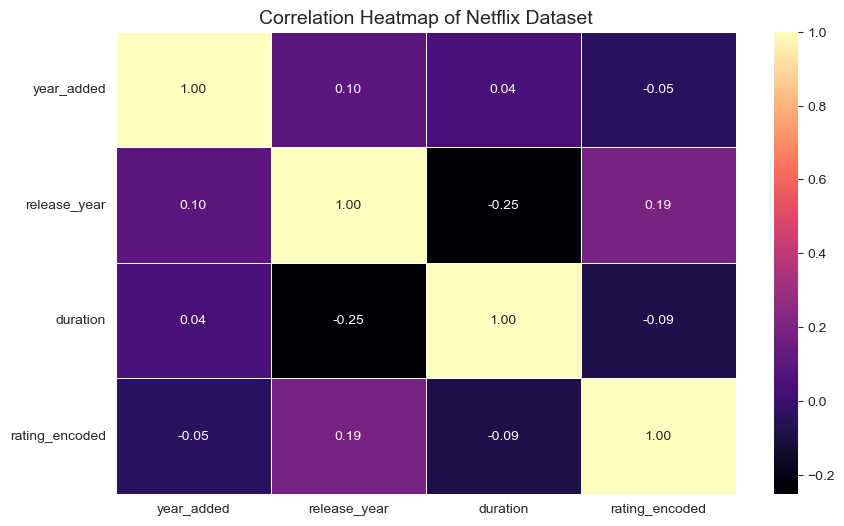

In [69]:
rating_map = {
    "G": 1, "PG": 2, "PG-13": 3, "R": 4, "NC-17": 5,
    "TV-Y": 1, "TV-Y7": 2, "TV-G": 3, "TV-PG": 4, 
    "TV-14": 5, "TV-MA": 6
}
df_copy["rating_encoded"] = df_copy["rating"].map(rating_map)
numeric_df = df_copy[["year_added", "release_year", "duration", "rating_encoded"]].dropna()
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="magma", linewidths=0.5, fmt=".2f")

plt.yticks(rotation=0)
plt.title("Correlation Heatmap of Netflix Dataset", fontsize=14)
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


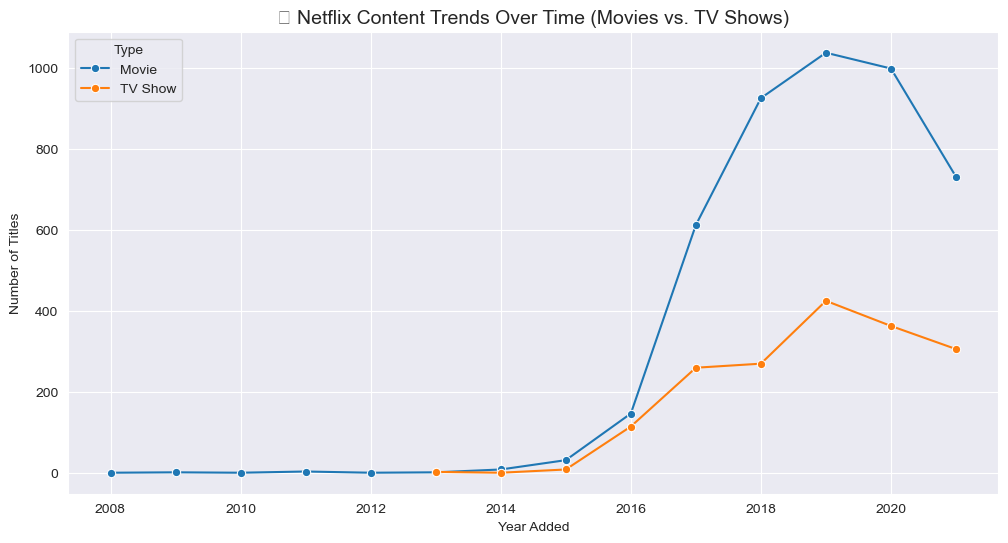

In [73]:
content_trend = df_copy.groupby(["year_added", "type"])["title"].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=content_trend, x="year_added", y="title", hue="type", marker="o")

plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.title("📈 Netflix Content Trends Over Time (Movies vs. TV Shows)", fontsize=14)
plt.legend(title="Type")
plt.show()


In [77]:
df_copy = df_copy.dropna()  # Removes all rows with NaN values
df_copy.to_csv("Cleaned_Netflix_data.csv", index=False)
print("File successfully created without NaN values!")

File successfully created without NaN values!
